In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.fftpack
import scipy.signal
from scipy import *
import copy

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Sep 02 19:33:06 2018', '__version__': '1.0', '__globals__': [], 'signal': array([[ 0.06279826,  0.13159016,  0.19976369, ..., -0.94536539,
        -0.98003905, -0.99767638]]), 'srate': array([[1000]], dtype=uint16), 'time': array([[-3.   , -2.999, -2.998, ...,  2.998,  2.999,  3.   ]])}
[ 0.06279826  0.13159016  0.19976369 ... -0.94536539 -0.98003905
 -0.99767638]
(6001,)
[-3.    -2.999 -2.998 ...  2.998  2.999  3.   ]
1000


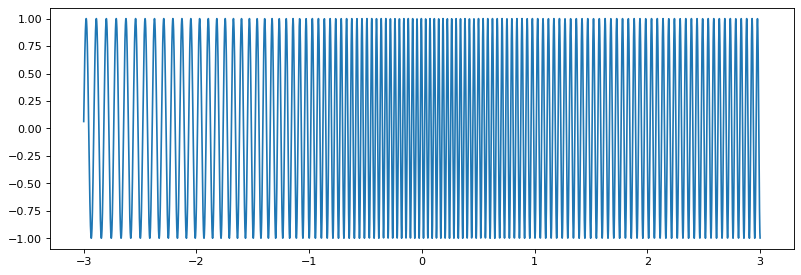

In [2]:
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

# import data
data = sio.loadmat('./spectral_codeChallenge.mat')
print(data)
signal = data["signal"][0]
time = data["time"][0]
srate = data["srate"][0][0]

print(signal)
print(signal.shape)
print(time)
print(srate)
n = len(signal)

plt.plot(time,signal)
plt.show()

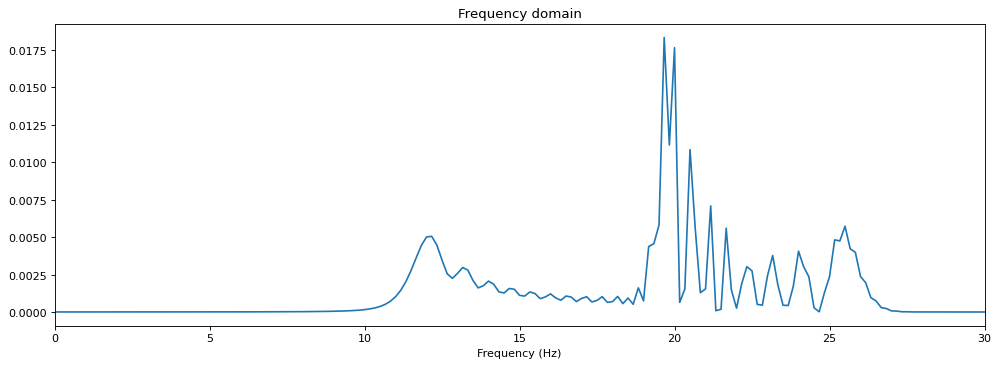

In [3]:
# compute the power spectrum
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))
bcpow = np.abs(scipy.fftpack.fft(signal) /n)**2

# now plot it
figure(figsize=(15, 5), dpi=80)
plt.plot(hz,bcpow[0:len(hz)])
plt.xlabel('Frequency (Hz)')
plt.title('Frequency domain')
plt.xlim([0,30])
plt.show()

winonsets: (11,)
[   0  500 1000 1500 2000 2500 3000 3500 4000 4500 5000] 1000
[-2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
(11, 40)


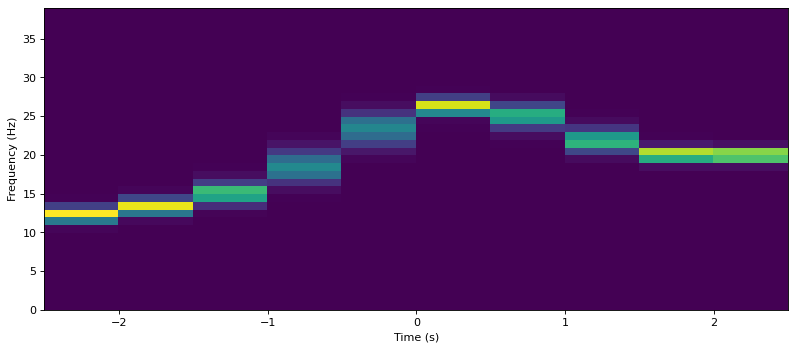

In [42]:
from matplotlib.pyplot import figure
figure(figsize=(12, 5), dpi=80)

## "manual" Welch's method

# window length in seconds*srate
winlength = int( 1*srate )

# number of points of overlap
nOverlap = np.round(srate/2)

# window onset times
winonsets = np.arange(0,int(n-winlength),int(winlength-nOverlap))
print("winonsets: {}".format(winonsets.shape))
# note: different-length signal needs a different-length Hz vector
hzW = np.linspace(0,srate/2,int(np.floor(winlength/2)+1))

# Hann window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,int(winlength)))/2

frex = hzW[:40]

# initialize the power matrix (windows x frequencies)
signalPow = np.zeros( (len(winonsets), len(frex)   ))

# loop over frequencies
for wi in range(0,len(winonsets)):
    
    # get a chunk of data from this time window
    datachunk = signal[ winonsets[wi]:winonsets[wi]+winlength ]

    # apply Hann taper to data
    datachunk = datachunk * hannw

    # compute its power
    tmppow = np.abs(scipy.fftpack.fft(datachunk)/winlength)**2

    # enter into matrix
    signalPow[wi][:]=  signalPow[wi][:] + tmppow[:len(frex)]

# divide by N
signalPow = signalPow / len(winonsets)

print("{} {}".format(winonsets, srate))

print(winonsets/srate-2.5)
#print(frex)
print(signalPow.shape)


# plotting
plt.pcolormesh(winonsets/srate-2.5,frex,np.transpose(signalPow))
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.show()